In [15]:
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
files = glob(f'predictors*.xlsx')
df = pd.concat(pd.read_excel(excel_file) for excel_file in files)

In [9]:
df

,model,score_test,roc_auc,accuracy,balanced_accuracy,f1,f1_macro,f1_micro,average_precision,precision,...,hyperparameters,hyperparameters_fit,ag_args_fit,features,compile_time,child_hyperparameters,child_hyperparameters_fit,child_ag_args_fit,ancestors,descendants
0,CatBoost_r12_FULL,0.980867,0.994286,0.937500,0.908571,0.857143,0.908571,0.937500,0.982143,0.857143,...,"{'iterations': 239, 'learning_rate': 0.0353402...",{'iterations': 239},"{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['clin-reservaCognitiva_escolaridad', 'demo-ed...",NaN,NaN,NaN,NaN,[],[]
1,CatBoost_r167_FULL,0.980867,0.994286,0.937500,0.908571,0.857143,0.908571,0.937500,0.982143,0.857143,...,"{'iterations': 470, 'learning_rate': 0.0848160...",{'iterations': 470},"{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['clin-reservaCognitiva_escolaridad', 'demo-ed...",NaN,NaN,NaN,NaN,[],[]
2,XGBoost_r89_FULL,0.980867,0.994286,0.937500,0.908571,0.857143,0.908571,0.937500,0.982143,0.857143,...,"{'n_estimators': 58, 'learning_rate': 0.087757...",{},"{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['clin-reservaCognitiva_escolaridad', 'demo-ed...",NaN,NaN,NaN,NaN,[],[]
3,XGBoost_r95_FULL,0.966270,0.988571,0.906250,0.888571,0.800000,0.869388,0.906250,0.968254,0.750000,...,"{'n_estimators': 98, 'learning_rate': 0.066341...",{},"{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['clin-reservaCognitiva_escolaridad', 'demo-ed...",NaN,NaN,NaN,NaN,[],[]
4,XGBoost_FULL,0.966270,0.988571,0.937500,0.960000,0.875000,0.916667,0.937500,0.968254,0.777778,...,"{'n_estimators': 74, 'learning_rate': 0.1, 'n_...",{},"{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['clin-reservaCognitiva_escolaridad', 'demo-ed...",NaN,NaN,NaN,NaN,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,NeuralNetTorch_r79_FULL,0.448614,0.851190,0.741935,0.479167,0.000000,0.425926,0.741935,0.518398,0.000000,...,"{'num_epochs': 13, 'epochs_wo_improve': None, ...","{'batch_size': 32, 'num_epochs': 0}","{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['clin-reservaCognitiva_escolaridad', 'demo-ed...",NaN,NaN,NaN,NaN,[],[]
214,NeuralNetTorch_r86_FULL,0.435668,0.839286,0.774194,0.500000,0.000000,0.436364,0.774194,0.505495,0.000000,...,"{'num_epochs': 12, 'epochs_wo_improve': None, ...","{'batch_size': 32, 'num_epochs': 0}","{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['clin-reservaCognitiva_escolaridad', 'demo-ed...",NaN,NaN,NaN,NaN,[],[]
215,NeuralNetTorch_r135,0.417275,0.827381,0.741935,0.529762,0.200000,0.523077,0.741935,0.486194,0.333333,...,"{'num_epochs': 1000, 'epochs_wo_improve': None...","{'batch_size': 32, 'num_epochs': 26}","{'max_memory_usage_ratio': 1.0, 'max_time_limi...","['clin-reservaCognitiva_escolaridad', 'demo-ed...",NaN,NaN,NaN,NaN,[],[]
216,NeuralNetTorch_r89,0.405416,0.827381,0.741935,0.529762,0.200000,0.523077,0.741935,0.460575,0.333333,...,"{'num_epochs': 1000, 'epochs_wo_improve': None...","{'batch_size': 32, 'num_epochs': 13}","{'max_memory_usage_ratio': 1.0, 'max_time_limi...","['clin-reservaCognitiva_escolaridad', 'demo-ed...",NaN,NaN,NaN,NaN,[],[]


In [25]:
y_lim = (0.65, 1)

C:\Users\jgala\AppData\Local\Temp\ipykernel_14660\753663690.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['model'] = pd.Categorical(df_top['model'], categories=orden_modelos, ordered=True)


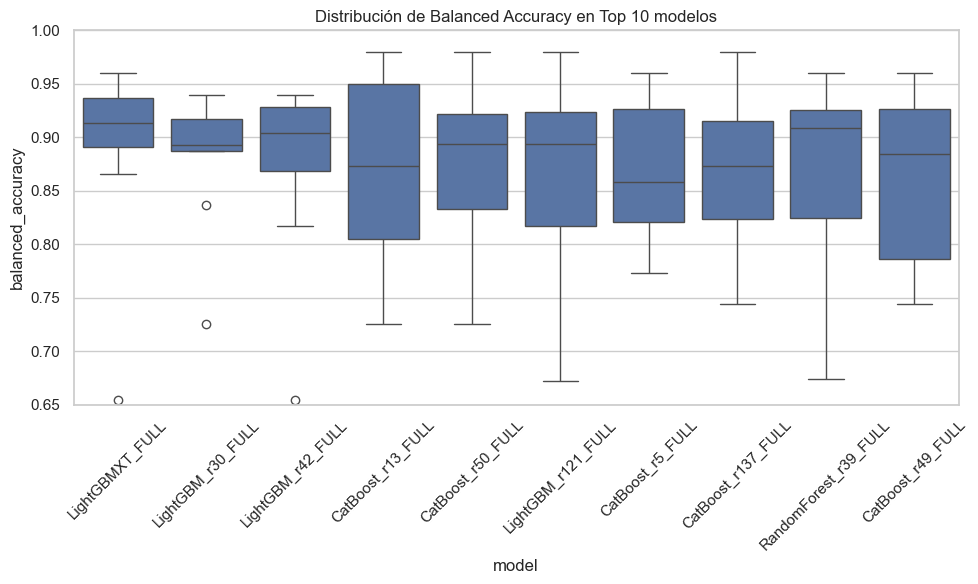

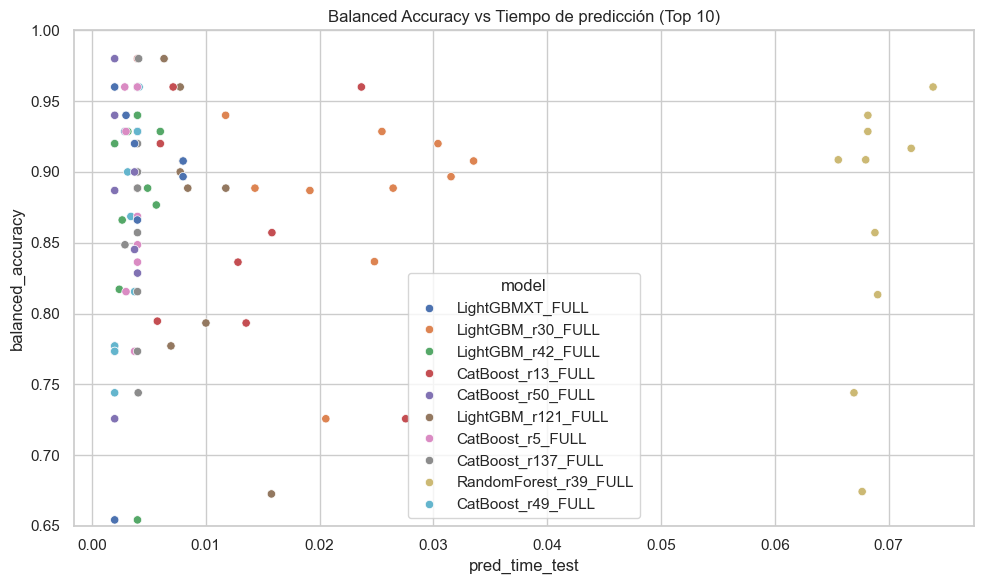

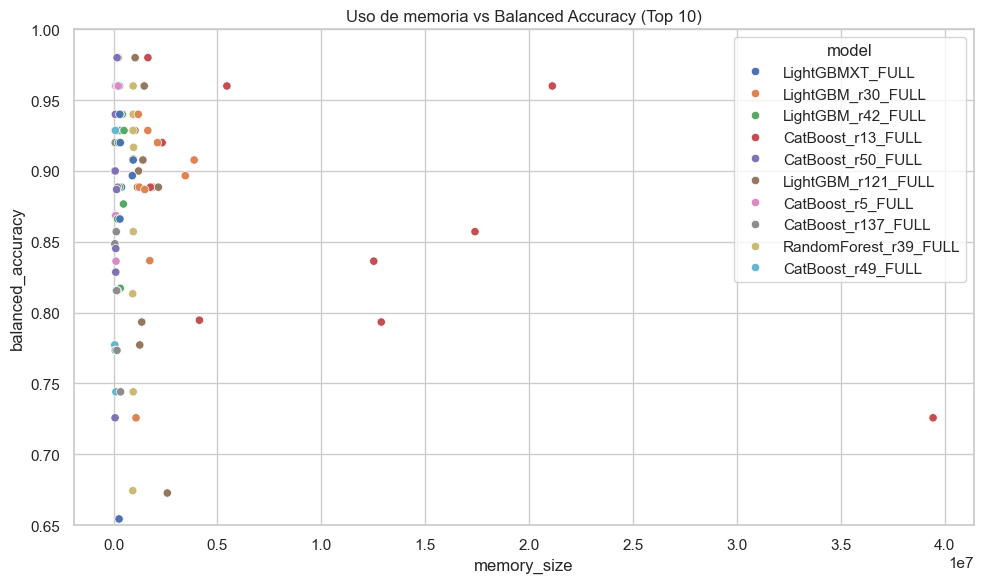

C:\Users\jgala\AppData\Local\Temp\ipykernel_14660\753663690.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_metricas = df_top.groupby('model')[metricas].mean()


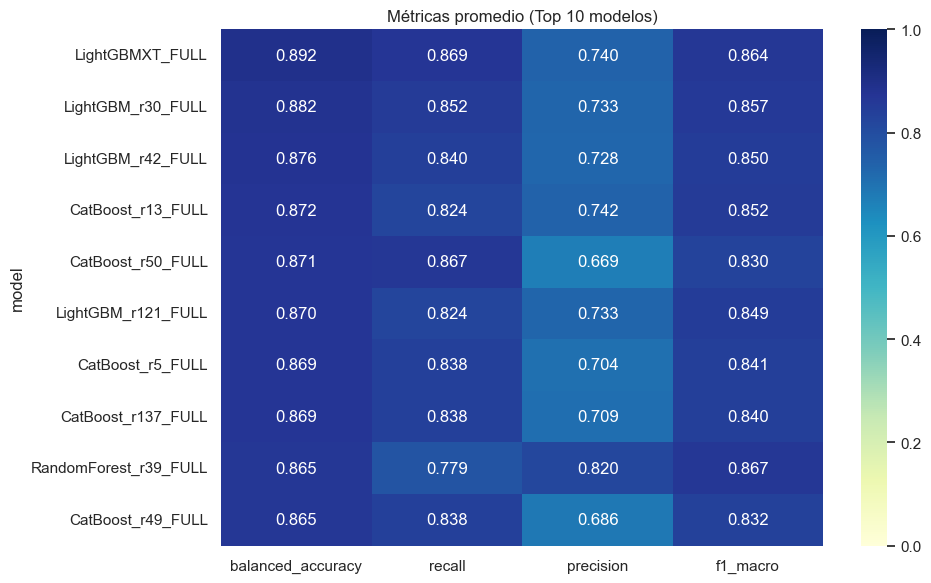

In [26]:
# === 1. SELECCIÓN DE LOS 10 MEJORES MODELOS POR BALANCED ACCURACY ===
top_models = (
    df.groupby('model')
      .agg(mean_balanced_acc=('balanced_accuracy', 'mean'))
      .sort_values(by='mean_balanced_acc', ascending=False)
      .head(10)
      .index
)

df_top = df[df['model'].isin(top_models)]

# Ordenar df_top por modelo según rendimiento
orden_modelos = (
    df_top.groupby('model')['balanced_accuracy']
    .mean()
    .sort_values(ascending=False)
    .index.tolist()
)
df_top['model'] = pd.Categorical(df_top['model'], categories=orden_modelos, ordered=True)

# === 2. DISTRIBUCIÓN DE BALANCED ACCURACY (BOXPLOT) ===
plt.figure()
sns.boxplot(data=df_top, x='model', y='balanced_accuracy', order=orden_modelos)
plt.xticks(rotation=45)
plt.ylim(y_lim)
plt.title("Distribución de Balanced Accuracy en Top 10 modelos")
plt.tight_layout()
plt.show()

# === 4. BALANCED ACCURACY VS TIEMPO DE PREDICCIÓN ===
plt.figure()
sns.scatterplot(data=df_top, x='pred_time_test', y='balanced_accuracy', hue='model')
plt.ylim(y_lim)
plt.title("Balanced Accuracy vs Tiempo de predicción (Top 10)")
plt.tight_layout()
plt.show()

# === 5. BALANCED ACCURACY VS USO DE MEMORIA ===
plt.figure()
sns.scatterplot(data=df_top, x='memory_size', y='balanced_accuracy', hue='model')
plt.ylim(y_lim)
plt.title("Uso de memoria vs Balanced Accuracy (Top 10)")
plt.tight_layout()
plt.show()

# === 6. HEATMAP DE MÉTRICAS COMPLEMENTARIAS ===
metricas = ['balanced_accuracy', 'recall', 'precision', 'f1_macro']
df_metricas = df_top.groupby('model')[metricas].mean()
df_metricas = df_metricas.loc[orden_modelos]  # Asegurar orden

plt.figure()
sns.heatmap(df_metricas, annot=True, fmt=".3f", cmap="YlGnBu", vmin=0, vmax=1)
plt.title("Métricas promedio (Top 10 modelos)")
plt.tight_layout()
plt.show()